# George Carlin

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import os
import re
plt.style.use('ggplot')
sns.set(rc={'figure.figsize':(10.7,4.27)})

In [2]:
# load data
# raw_data
file = '05_clean_data_OCT_19.csv'
data_directory = os.path.join( '..','data','raw_data/{}'.format(file))

In [3]:
df = pd.read_csv(data_directory)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 10 columns):
name                 247 non-null object
title                247 non-null object
summary              247 non-null object
year                 247 non-null int64
transcript           247 non-null object
link                 247 non-null object
len_transcript       247 non-null int64
dob                  247 non-null object
sex                  247 non-null object
age_when_recorded    247 non-null int64
dtypes: int64(3), object(7)
memory usage: 19.4+ KB


In [5]:
df.head()

,name,title,summary,year,transcript,link,len_transcript,dob,sex,age_when_recorded
0,Nikki Glaser,Bangin’,A NETFLIX ORIGINAL COMEDY SPECIAL Thank you! T...,2019,A NETFLIX ORIGINAL COMEDY SPECIAL\nThank you! ...,https://scrapsfromtheloft.com/2019/10/04/nikki...,53937,1984-01-01,Female,35
1,Bill Burr,Paper Tiger,"Only a few weeks after Dave Chappelle's ""Stick...",2019,"Recorded Live at the Royal Albert Hall, London...",https://scrapsfromtheloft.com/2019/09/10/bill-...,60486,1968-06-10,Male,51
2,Dave Chappelle,Sticks & Stones,Legendary comedian Dave Chappelle is back with...,2019,Sticks & Stones is Dave Chappelle’s fifth Netf...,https://scrapsfromtheloft.com/2019/08/26/dave-...,42293,1973-08-24,Male,46
3,Emily Heller,Ice Thickeners,"Emily Heller compares Donald Trump to Air Bud,...",2019,"Emily Heller compares Donald Trump to Air Bud,...",https://scrapsfromtheloft.com/2019/08/25/emily...,44383,1985-01-01,Male,34
4,David Cross,Oh Come On,Transcript of David Cross' latest stand-up sho...,2019,This is the full transcript of David Cross’ la...,https://scrapsfromtheloft.com/2019/08/13/david...,55980,1964-01-01,Male,55


## Select George Carlin

In [6]:
df.name.value_counts()[:10]

George Carlin       16
Dave Chappelle       9
Louis C.K.           7
Jim Jefferies        6
Bill Burr            6
Chris Rock           5
Gabriel Iglesias     4
Amy Schumer          4
Eddie Izzard         4
Iliza Shlesinger     4
Name: name, dtype: int64

In [7]:
GC = df.name =='George Carlin'

In [8]:
data = df[GC]

In [9]:
data = data[['title','transcript','len_transcript','year','age_when_recorded','sex']]

In [10]:
# sort by release year, reset index
data = data.sort_values('year').reset_index(drop=True)

In [11]:
data

,title,transcript,len_transcript,year,age_when_recorded,sex
0,At Usc,"Good evening, I’m Shana Alexander. Home Box Of...",55980,1977,40,Male
1,Again!*,* sometimes listed as On Location: George Carl...,59330,1978,41,Male
2,Carlin At Carnegie,"Recorded at Carnegie Hall, New York City in 19...",41394,1983,46,Male
3,Carlin On Campus,[School bell] Welcome to the home of the class...,42004,1984,47,Male
4,Playing With Your Head,"Recorded May 2–3, 1986, at the Beverly Theater...",41406,1986,49,Male
5,What Am I Doing In New Jersey?,What Am I Doing in New Jersey? is the 12th alb...,37468,1988,51,Male
6,Doin’ It Again,"Recorded on January 12–13, 1990, State Theatre...",43568,1990,53,Male
7,Jamming In New York Testo Italiano Completo,"Ciao, grazie. Grazie. Grazie. Grazie molte. Gr...",48594,1992,55,Male
8,Jamming In New York,Jammin’ in New York is George Carlin’s 14th al...,45951,1992,55,Male
9,Back In Town,Back in Town is George Carlin’s 15th album and...,45876,1996,59,Male


# remove non english

In [12]:
data.drop([7,10,14],inplace=True)

In [13]:
data = data.reset_index(drop=True)

In [14]:
data

,title,transcript,len_transcript,year,age_when_recorded,sex
0,At Usc,"Good evening, I’m Shana Alexander. Home Box Of...",55980,1977,40,Male
1,Again!*,* sometimes listed as On Location: George Carl...,59330,1978,41,Male
2,Carlin At Carnegie,"Recorded at Carnegie Hall, New York City in 19...",41394,1983,46,Male
3,Carlin On Campus,[School bell] Welcome to the home of the class...,42004,1984,47,Male
4,Playing With Your Head,"Recorded May 2–3, 1986, at the Beverly Theater...",41406,1986,49,Male
5,What Am I Doing In New Jersey?,What Am I Doing in New Jersey? is the 12th alb...,37468,1988,51,Male
6,Doin’ It Again,"Recorded on January 12–13, 1990, State Theatre...",43568,1990,53,Male
7,Jamming In New York,Jammin’ in New York is George Carlin’s 14th al...,45951,1992,55,Male
8,Back In Town,Back in Town is George Carlin’s 15th album and...,45876,1996,59,Male
9,You Are All Diseased,You Are All Diseased is the 16th album and 11t...,49997,1999,62,Male


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 6 columns):
title                13 non-null object
transcript           13 non-null object
len_transcript       13 non-null int64
year                 13 non-null int64
age_when_recorded    13 non-null int64
sex                  13 non-null object
dtypes: int64(3), object(3)
memory usage: 704.0+ bytes


# Clean text

In [16]:
def clean_text(data):
    #print(type(data))
    text = data.lower()
    text = re.sub('\[.*?\]', '', text)  # remove brackets & text inside
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # remove punctuations
    text = re.sub('\w*\d\w*', '', text)  # remove digits surounded by words
    text = re.sub('[‘’“”…]', '', text)  # remove quotes & elipses
    text = re.sub('\n', ' ', text)  # remove new line
    text = re.sub('\t', ' ', text)  # remove new line
    #text = re.sub(string.whitespace, '', text)  # remove \n\t..
    return text

In [17]:
#df = df[['title','transcript','len_transcript','year','age_when_recorded','sex']]
data = data[['title','transcript','len_transcript','year','age_when_recorded']]

In [18]:
#df['clean_text'] = df.transcript.apply(clean_text)
data['clean_text'] = data.transcript.apply(clean_text)

In [19]:
#df.drop(['transcript'],axis=1,inplace=True)
data.drop(['transcript'],axis=1,inplace=True)

In [20]:
data.head()

,title,len_transcript,year,age_when_recorded,clean_text
0,At Usc,55980,1977,40,good evening im shana alexander home box offic...
1,Again!*,59330,1978,41,sometimes listed as on location george carlin...
2,Carlin At Carnegie,41394,1983,46,recorded at carnegie hall new york city in re...
3,Carlin On Campus,42004,1984,47,welcome to the home of the class clown the th...
4,Playing With Your Head,41406,1986,49,recorded may – at the beverly theater in los ...


# Sentiment Analysis

In [21]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['clean_text'].apply(pol)
data['subjectivity'] = data['clean_text'].apply(sub)
data.head()

,title,len_transcript,year,age_when_recorded,clean_text,polarity,subjectivity
0,At Usc,55980,1977,40,good evening im shana alexander home box offic...,0.073347,0.538630
1,Again!*,59330,1978,41,sometimes listed as on location george carlin...,0.001163,0.522967
2,Carlin At Carnegie,41394,1983,46,recorded at carnegie hall new york city in re...,0.026689,0.572234
3,Carlin On Campus,42004,1984,47,welcome to the home of the class clown the th...,0.024074,0.504345
4,Playing With Your Head,41406,1986,49,recorded may – at the beverly theater in los ...,0.067904,0.512550


In [24]:
d = data.set_index('title')

In [25]:
d

,len_transcript,year,age_when_recorded,clean_text,polarity,subjectivity
title,,,,,,
At Usc,55980,1977,40,good evening im shana alexander home box offic...,0.073347,0.538630
Again!*,59330,1978,41,sometimes listed as on location george carlin...,0.001163,0.522967
Carlin At Carnegie,41394,1983,46,recorded at carnegie hall new york city in re...,0.026689,0.572234
Carlin On Campus,42004,1984,47,welcome to the home of the class clown the th...,0.024074,0.504345
Playing With Your Head,41406,1986,49,recorded may – at the beverly theater in los ...,0.067904,0.512550
What Am I Doing In New Jersey?,37468,1988,51,what am i doing in new jersey is the album an...,0.060144,0.488094
Doin’ It Again,43568,1990,53,recorded on january – state theatre new bruns...,0.031905,0.516183
Jamming In New York,45951,1992,55,jammin in new york is george carlins album an...,0.031729,0.525063
Back In Town,45876,1996,59,back in town is george carlins album and nint...,0.021043,0.526666


In [26]:
data

,title,len_transcript,year,age_when_recorded,clean_text,polarity,subjectivity
0,At Usc,55980,1977,40,good evening im shana alexander home box offic...,0.073347,0.538630
1,Again!*,59330,1978,41,sometimes listed as on location george carlin...,0.001163,0.522967
2,Carlin At Carnegie,41394,1983,46,recorded at carnegie hall new york city in re...,0.026689,0.572234
3,Carlin On Campus,42004,1984,47,welcome to the home of the class clown the th...,0.024074,0.504345
4,Playing With Your Head,41406,1986,49,recorded may – at the beverly theater in los ...,0.067904,0.512550
5,What Am I Doing In New Jersey?,37468,1988,51,what am i doing in new jersey is the album an...,0.060144,0.488094
6,Doin’ It Again,43568,1990,53,recorded on january – state theatre new bruns...,0.031905,0.516183
7,Jamming In New York,45951,1992,55,jammin in new york is george carlins album an...,0.031729,0.525063
8,Back In Town,45876,1996,59,back in town is george carlins album and nint...,0.021043,0.526666
9,You Are All Diseased,49997,1999,62,you are all diseased is the album and hbo li...,0.027935,0.512605


## Plot

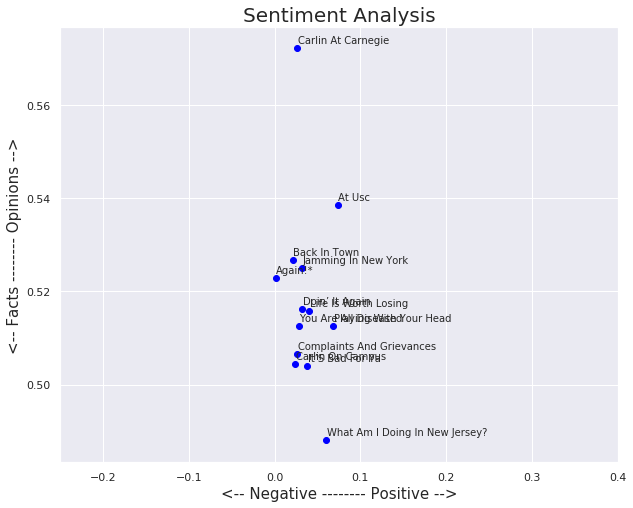

In [27]:

# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[index]
    y = data.subjectivity.loc[index]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['title'][index], fontsize=10)
    plt.xlim(-.25, +0.4) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## outliers
- could they be in a diffrent langauge?

In [ ]:
g = sns.jointplot("age_when_recorded", "polarity", data=data, kind="reg",
                  xlim=(0, 70), ylim=(-0.2, 0.2), color="m")

In [ ]:
g = sns.jointplot("age_when_recorded", "subjectivity", data=df, kind="reg",
                  xlim=(0, 70), ylim=(0.4, 0.6), color="m")

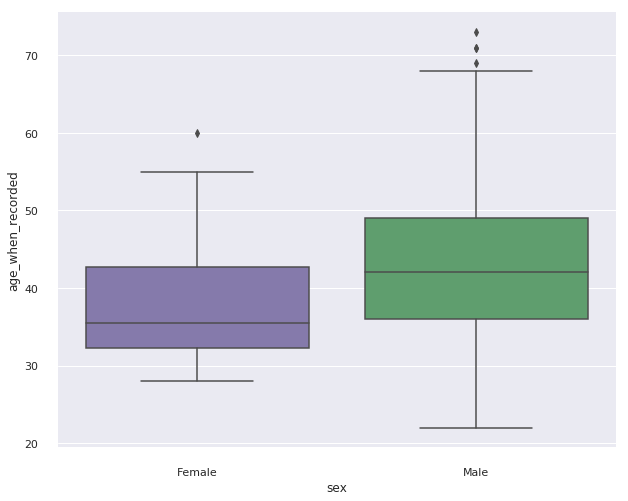

In [28]:
sns.boxplot(x="sex", y="age_when_recorded",
            palette=["m", "g"],
            data=df)
sns.despine(offset=10, trim=True)